In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Celsius to Fahrenheit.csv')

In [ ]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temp_df.tail(5)

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<Axes: ylabel='count'>

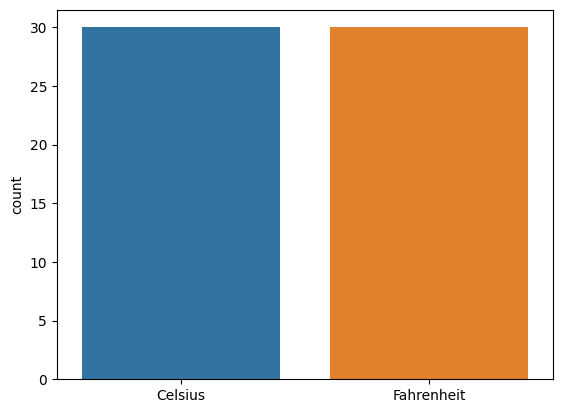

In [ ]:
sns.countplot(data = temp_df)

In [ ]:
X = temp_df[['Celsius']]
y = temp_df[['Fahrenheit']]

In [ ]:
X.shape

(30, 1)

In [ ]:
y.shape

(30, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = 0.2)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 3, activation = 'linear', input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 2)
epochs_hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, callbacks = [es])

Epoch 1/50
1/1 [==============================] - 1s 689ms/step - loss: 0.0696 - val_loss: 35.0249
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 39.4044 - val_loss: 1.8102
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 2.1530 - val_loss: 10.2817
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 11.9752 - val_loss: 3.0354


<Axes: >

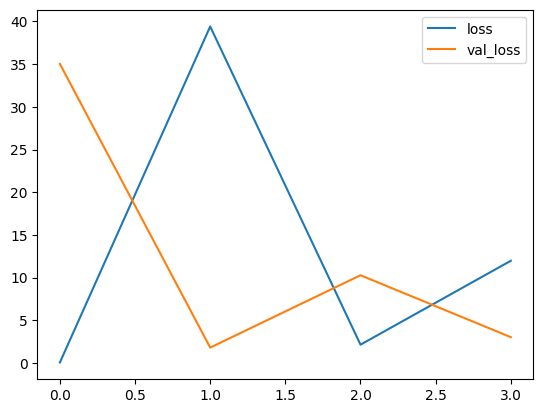

In [ ]:
hist = model.history.history
df = pd.DataFrame(hist)
df.plot()

In [ ]:
y_predict = model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [ ]:
y_predict

array([[-1.3815207],
       [-1.3637844],
       [-1.1864203],
       [-1.4524665],
       [-1.0977381],
       [-1.4169936]], dtype=float32)

In [ ]:
model.save('MODEL.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
from tensorflow.keras.models import load_model
pickle.dump(scaler, open("SCALER.pkl", "wb"))

In [ ]:
MODEL = load_model("MODEL.h5")

In [ ]:
temp_exp = {"Celsius": 60}

In [ ]:
def return_prediction(MODEL, scaler, sample_json):
  temp = sample_json['Celsius']
  val = [[temp]]
  new_val = scaler.fit_transform(val)
  predict_x = MODEL.predict(new_val)
  Temp_f = (1.8 * predict_x) + 32
  return Temp_f
return_prediction(MODEL, scaler, temp_exp)

1/1 [==============================] - 0s 32ms/step


array([[30.343327]], dtype=float32)